In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install easydev
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg3
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
import tensorflow as tf
from tensorflow.python.util import deprecation
import os
import logging
from tqdm import tqdm
from IPython.display import display, HTML
import geopy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import pacmap
from ds_utils.unsupervised import (
    plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
)
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score




# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)

pd.set_option('mode.chained_assignment', None)

RS = range(0,25,1)

print('currently running tensorflow version: ' + tf.__version__)

2022-09-08 12:40:55.013467: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


currently running tensorflow version: 2.9.1


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
prethicked = gl.predictions_finder()
prethicked

100%|██████████| 146/146 [00:01<00:00, 114.45it/s]


,architecture,epochs,learning rate,training module
0,50-28,100,0.1,7
19,24-12,100,0.1,1
38,64-48,100,0.1,2
57,59-28,100,0.1,3
76,64-36,100,0.1,4
95,50-25,100,0.1,5


In [3]:
idx = 0
training_module = prethicked['training module'].loc[idx]
architecture = prethicked['architecture'].loc[idx]
learning_rate = prethicked['learning rate'].loc[idx]
epochs = prethicked['epochs'].loc[idx]
df = gl.predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)

gl.glathida_stats_adder(
    df,
#     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
#     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
#     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df

100%|██████████| 15/15 [00:00<00:00, 373.99it/s]


,vol,Area_RGI_iqr,Area_RGI_mean,Area_RGI_median,Area_RGI_std,Aspect_RGI_iqr,Aspect_RGI_mean,Aspect_RGI_median,Aspect_RGI_std,Lmax_RGI_iqr,Lmax_RGI_mean,Lmax_RGI_median,Lmax_RGI_std,Slope_RGI_iqr,Slope_RGI_mean,Slope_RGI_median,Slope_RGI_std,Zmax_RGI_iqr,Zmax_RGI_mean,Zmax_RGI_median,Zmax_RGI_std,Zmin_RGI_iqr,Zmin_RGI_mean,Zmin_RGI_median,Zmin_RGI_std,architecture,area,dataframe,epochs,h mean f,learning rate,region,tolerance,total variance,volf,mean thickness,voldiff,Area_GlaThiDa_mean,Aspect_GlaThiDa_mean,Lmax_GlaThiDa_mean,Slope_GlaThiDa_mean,Zmin_GlaThiDa_mean,Zmax_GlaThiDa_mean,Area_GlaThiDa_median,Aspect_GlaThiDa_median,Lmax_GlaThiDa_median,Slope_GlaThiDa_median,Zmin_GlaThiDa_median,Zmax_GlaThiDa_median,Area_GlaThiDa_std,Aspect_GlaThiDa_std,Lmax_GlaThiDa_std,Slope_GlaThiDa_std,Zmin_GlaThiDa_std,Zmax_GlaThiDa_std,ratio trainable,vol_ratio,vol_from_zero
0,11.971913,0.68100,3.199242,0.3130,41.810153,234.00,192.250848,215.0,119.556115,1079.00,1532.236388,744.0,4166.345049,9.00,24.023993,23.00,7.280360,609.00,1816.157186,1797.0,554.464460,626.0,1337.327542,1334.0,500.317301,50-28,86725.053,df7_01,100,218.0,0.100,01,4.92,10.673079,18.98,138.044454,-7.008087,31.746125,178.125000,7208.750000,18.625000,1505.125000,2278.000000,1.8260,206.0,2351.0,21.00,1579.5,2554.0,76.730266,116.309326,13254.758068,5.452924,735.136116,800.062341,0.000295,0.630765,0.369235
1,1.538855,0.47200,0.770312,0.1820,4.561523,260.00,153.637072,103.0,127.722660,699.00,907.091806,567.0,1219.842485,9.50,24.509075,24.20,7.448535,678.00,2418.342668,2348.0,575.395510,651.0,2075.797666,1974.0,620.405019,50-28,14524.224,df7_02,100,72.0,0.100,02,0.27,8.179932,1.06,105.950909,0.478855,2.062406,168.531250,2526.000000,21.178125,2241.687500,3116.937500,1.1850,162.5,2138.0,20.80,2007.5,3011.0,3.074268,120.333387,2238.034517,5.621317,601.644384,608.579182,0.001697,1.451750,0.451750
2,15.218515,6.79175,23.110887,1.7665,124.489082,240.00,181.664028,183.0,120.751525,3503.25,4470.662929,1890.0,7968.824606,7.70,15.436148,14.35,6.115374,486.50,1053.961961,1059.0,367.481644,417.0,510.091689,524.5,292.298323,50-28,105108.312,df7_03,100,270.0,0.100,03,7.35,4.520922,28.33,144.788879,-13.111485,1238.533333,259.000000,54630.333333,6.100000,16.000000,1419.666667,999.8610,323.0,71606.0,6.30,0.0,1921.0,1046.519763,92.639085,32082.883332,0.509902,22.627417,819.563434,0.000658,0.537187,0.462813
3,4.216965,2.14750,5.514259,0.6570,43.879279,236.00,172.181254,163.0,120.474964,1924.50,2331.581389,1191.0,3683.474811,7.10,17.700000,16.90,5.800160,447.50,1119.713554,1120.0,315.732986,389.0,700.133378,695.0,303.851676,50-28,40888.228,df7_04,100,210.0,0.100,04,2.23,4.801514,8.61,103.133970,-4.393035,1479.180000,30.500000,31318.000000,7.300000,420.500000,1452.000000,1479.1800,30.5,31318.0,7.30,420.5,1452.0,1292.232000,20.500000,1445.000000,3.700000,17.500000,335.000000,0.000270,0.489775,0.510225
4,26.393191,1.70625,6.421827,0.3930,79.452633,216.00,179.796711,177.0,114.465345,1608.00,2042.748667,838.0,3956.978654,12.90,20.433266,19.60,9.216535,667.00,1253.893344,1221.0,488.323296,610.0,781.590460,761.0,436.168658,50-28,130054.846,df7_05,100,175.0,0.100,05,4.07,8.032514,15.69,202.938930,10.703191,20.154000,261.000000,8083.000000,11.300000,159.000000,983.000000,20.1540,261.0,8083.0,11.30,159.0,983.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,1.682166,0.682166
5,1.620819,2.58100,19.505422,0.5690,117.108721,229.00,170.499118,152.0,117.692026,2095.00,3148.227513,987.0,6825.961018,8.60,17.620459,16.70,6.571902,244.50,1295.209877,1267.0,247.578356,267.5,892.552028,936.0,252.231364,50-28,11059.574,df7_06,100,341.0,0.100,06,0.98,1.554516,3.77,146.553475,-2.149181,608.658000,142.000000,28302.666667,11.366667,477.666667,1511.000000,264.5360,117.0,22676.0,7.30,607.0,1762.0,682.150351,41.880783,25153.662349,7.512360,262.994719,499.241425,0.005282,0.429925,0.570075
6,3.535625,7.09350,21.027204,1.8740,78.127422,234.00,174.302167,164.0,120.216076,3937.50,4961.415480,2471.0,6949.757330,6.70,14.9239

# CLUSTER ANALYSIS

In [4]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()




RGI = gl.RGI_loader()

RGI = RGI[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
#     'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
drops = RGI[

#     (RGI['Aspect'] < 0) | 
    (RGI['Zmin'] < 0) |
    (RGI['Zmax'] < 0) |
    (RGI['Lmax'] < 0) 

].index
RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
RGI

ref = pd.merge(ref, RGI, left_index = True, right_index = True)
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmax,Area,Aspect,Lmax,Zdelta
167121,RGI60-01.00001,21.182035,01,34.409484,77.146095,22.6,5196,5595,0.409,31,972,399
167122,RGI60-01.00002,30.519478,01,34.424095,77.157513,16.2,5183,5591,1.042,348,1747,408
167123,RGI60-01.00003,35.518610,01,34.430626,77.166964,14.5,5284,5618,0.877,321,1506,334
167124,RGI60-01.00004,53.077263,01,34.405011,77.088658,22.2,5097,5543,0.216,359,974,446
167125,RGI60-01.00005,47.519207,01,34.399000,77.125338,34.7,5236,5595,0.193,357,506,359
...,...,...,...,...,...,...,...,...,...,...,...,...
167116,RGI60-19.02748,12.948014,19,34.541748,77.093400,20.3,5120,5830,1.560,34,2628,710
167117,RGI60-19.02749,22.894110,19,34.561759,77.072246,29.3,5190,5760,0.328,333,1120,570
167118,RGI60-19.02750,60.874610,19,34.565176,77.079956,30.2,5219,5715,0.335,344,1136,496
167119,RGI60-19.02751,10.053704,19,34.418078,77.121849,20.5,5084,5628,1.151,360,1799,544


In [5]:
RGI = ref[[
#     'CenLat',
#     'CenLon',
    'Slope',
    'Zmin',
    'Zmax',
    'Area',
    'Lmax',
    'Zdelta',
    'Aspect'
]]

In [6]:
scaler = StandardScaler()
RGI_std = scaler.fit_transform(RGI)
df_std = pd.DataFrame(RGI_std, columns = RGI.columns)
dft_std = scaler.fit_transform(RGI)

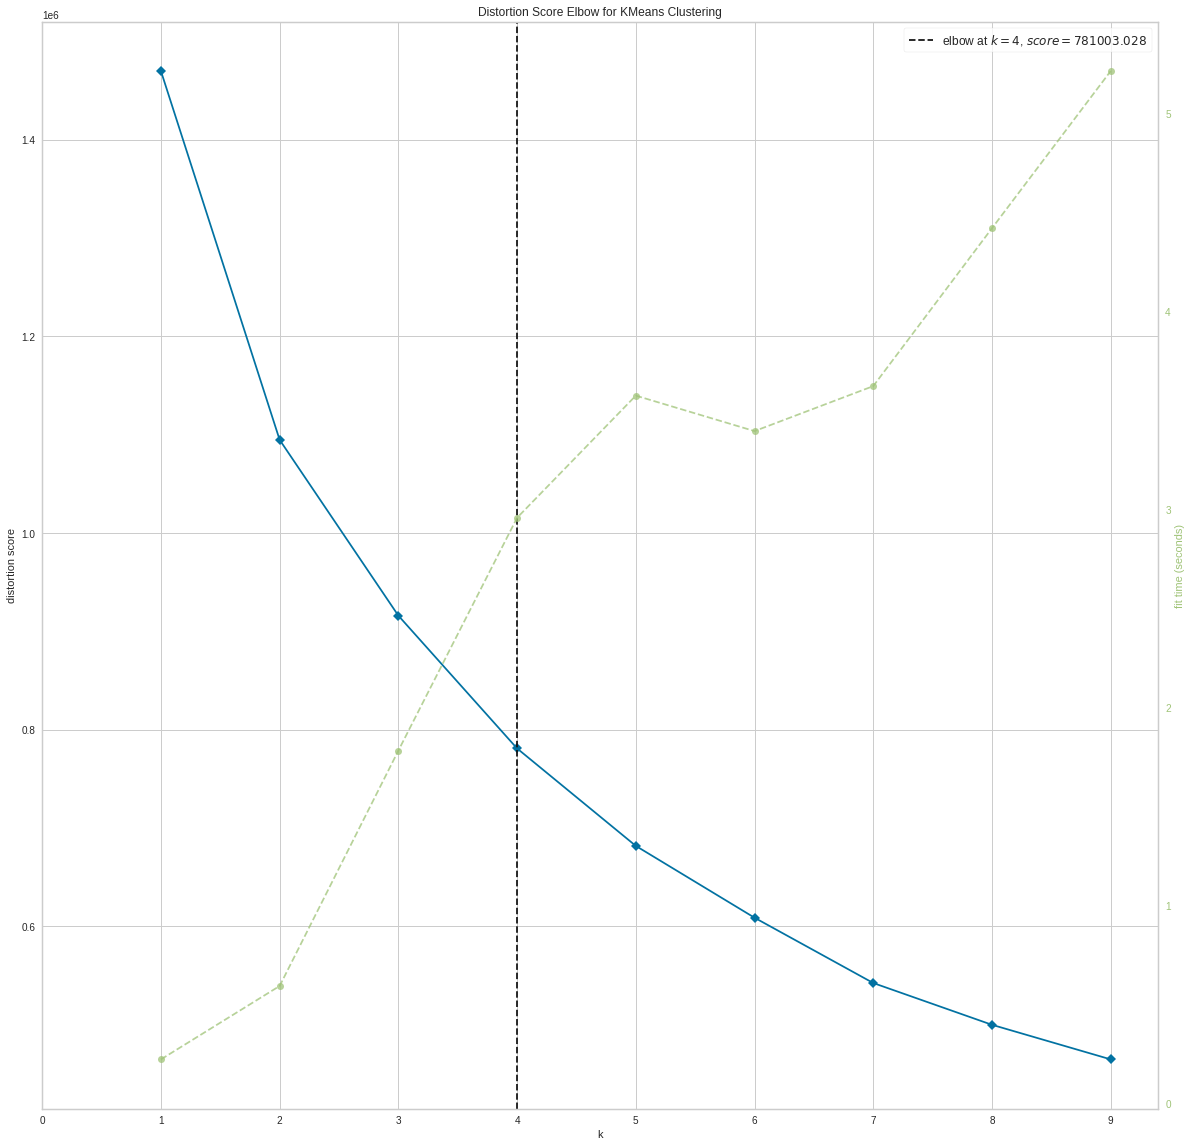

In [7]:
#     # ELBOW PLOT START

fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
fig.patch.set_facecolor('w')
visualizer = KElbowVisualizer(KMeans(), k=(1,10),ax=ax)
visualizer.fit(df_std)

ax.set_xticks(range(0,10))
visualizer.show()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_elbow.png'

fig.savefig(fig_dir + file_name)

# # ELBOW PLOT END

#     plt.show()    

100%|██████████| 5/5 [38:42<00:00, 464.58s/it]


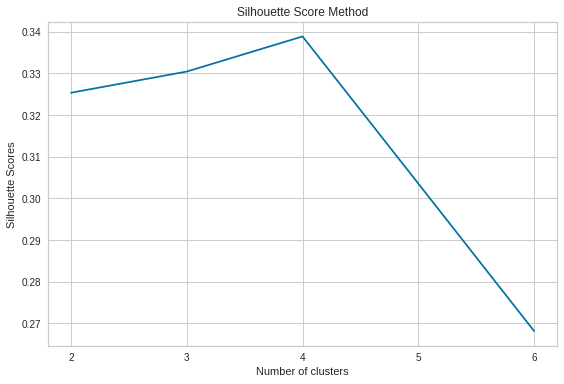

In [8]:

silhouette_scores = []
for k in tqdm(range(2, 7)):
    km = KMeans(n_clusters=k, 
                max_iter=100, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(df_std)
    silhouette_scores.append(silhouette_score(df_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_silhouette_score.png'

fig.savefig(fig_dir + file_name)

100%|██████████| 5/5 [1:21:58<00:00, 983.74s/it] 


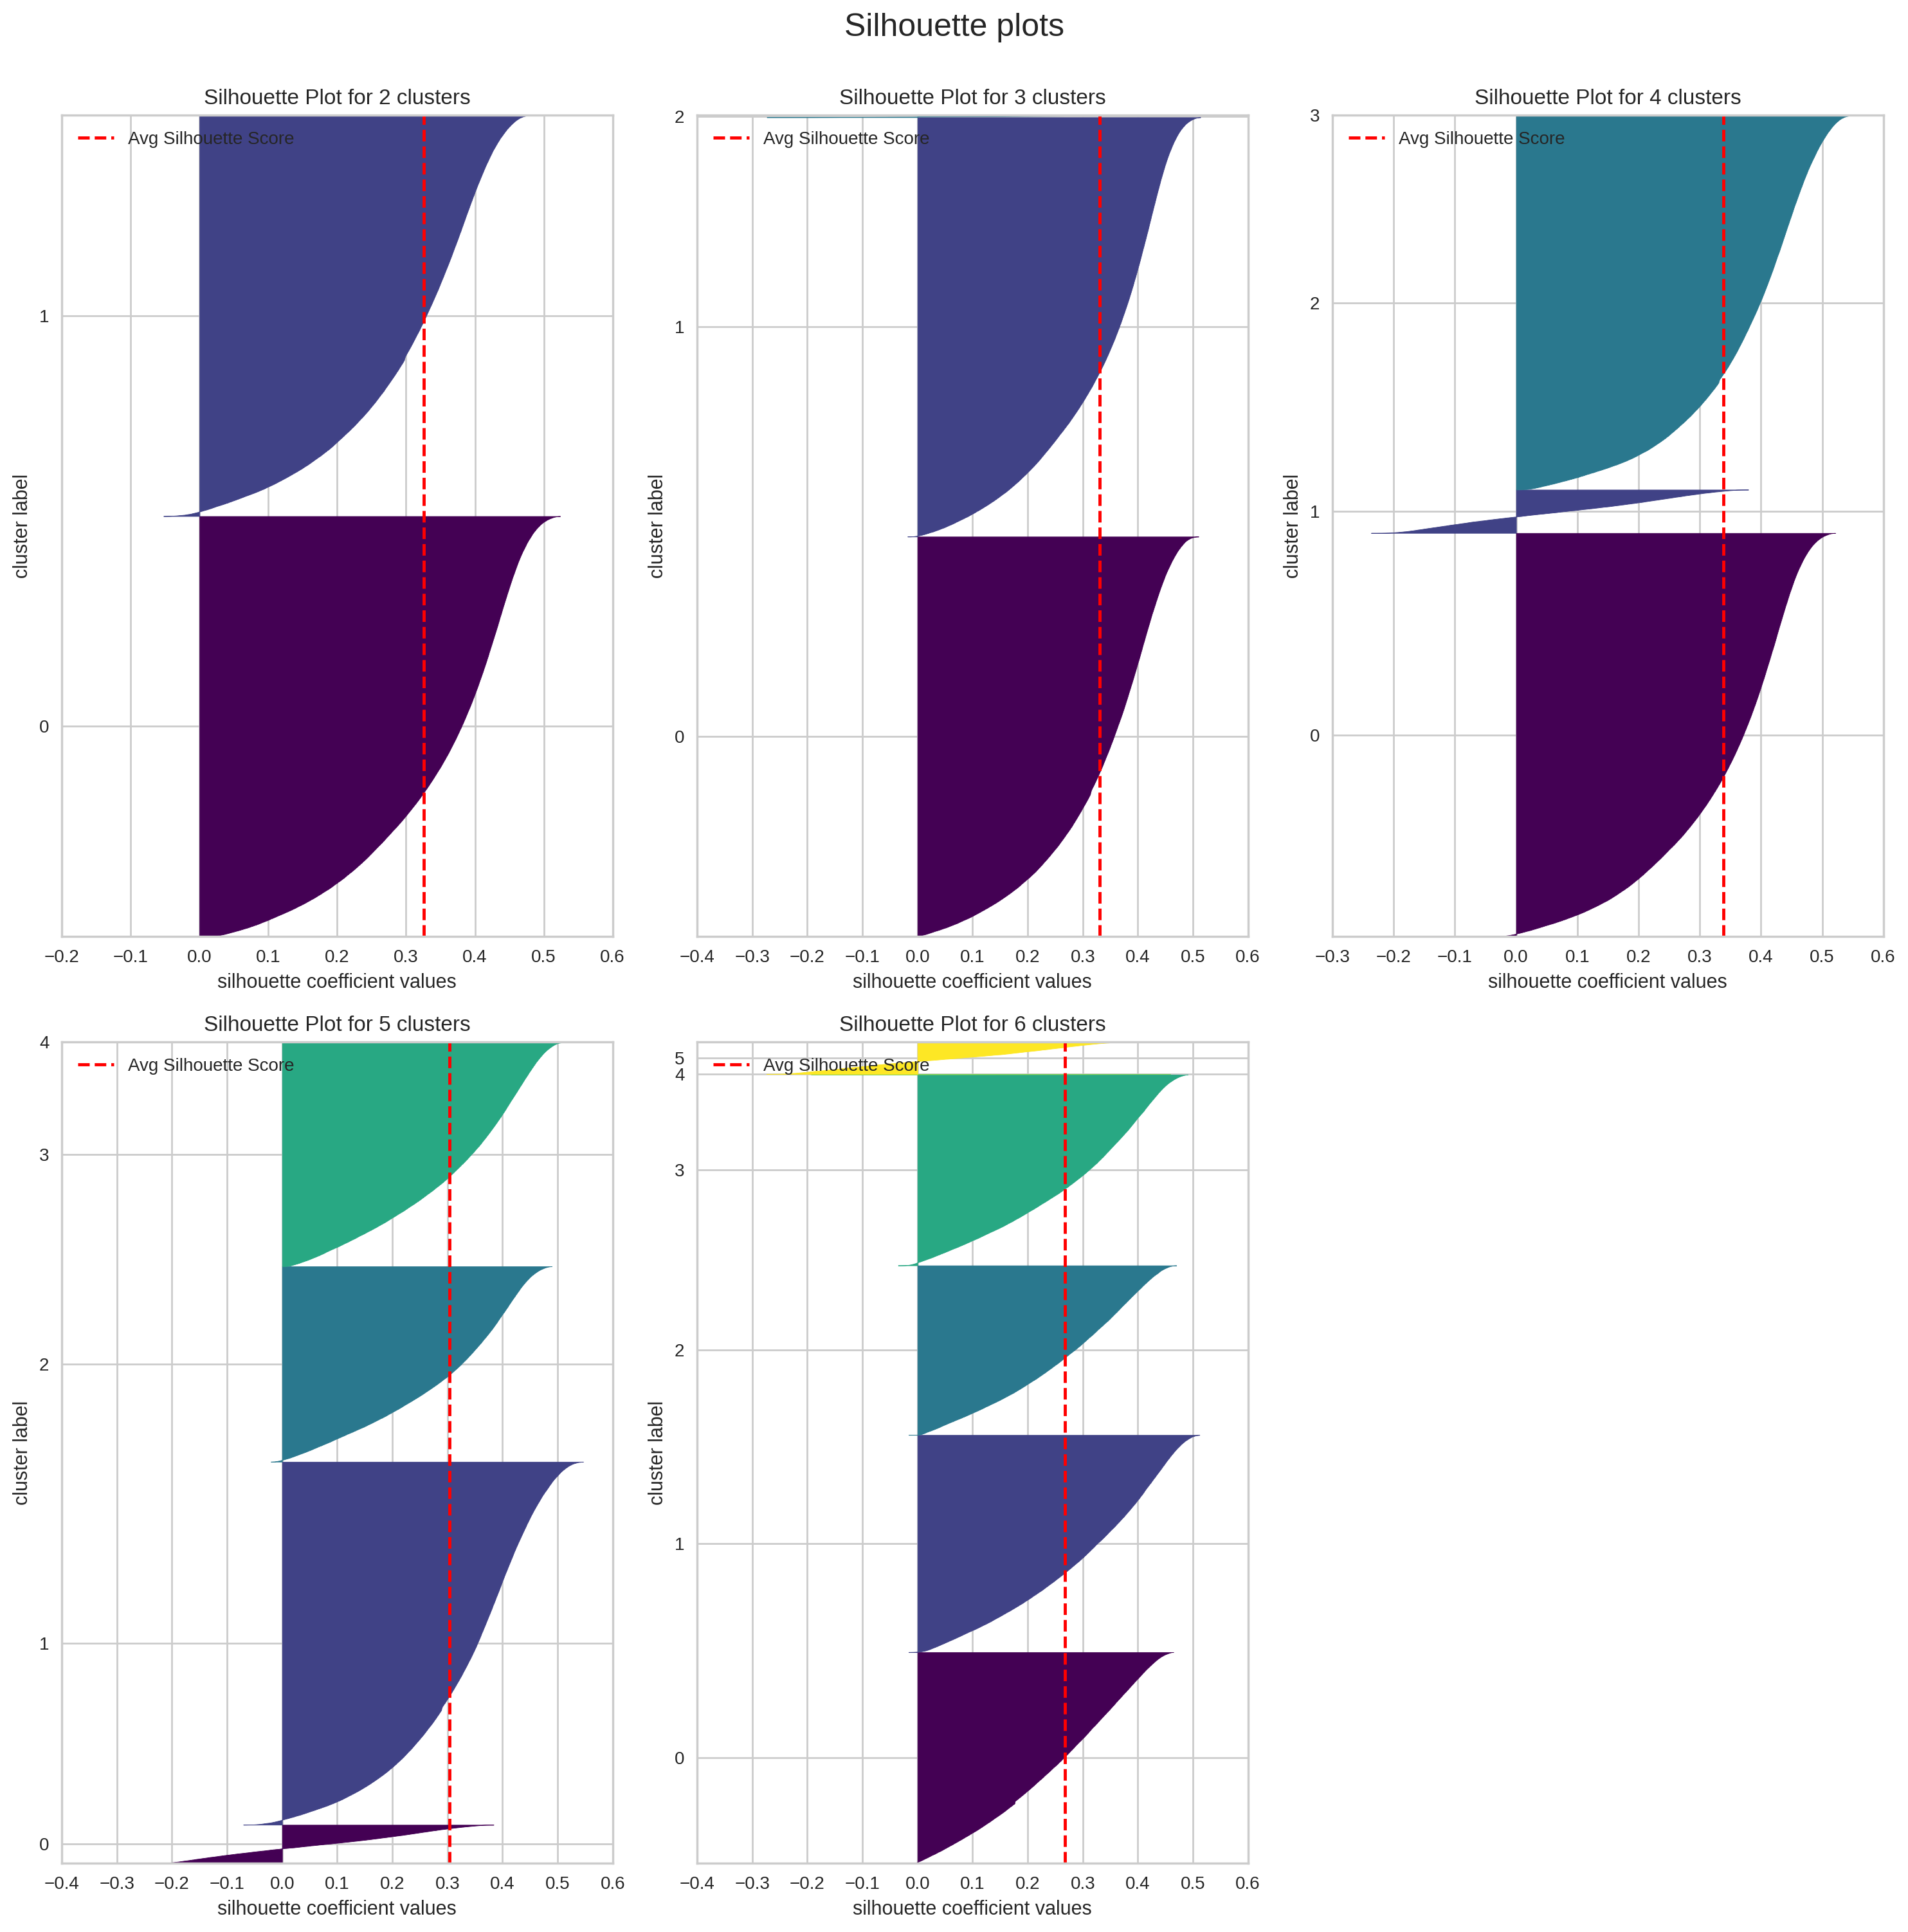

In [9]:
# Plot for multiple ks
colors = gl.color_grabber(
    n_colors = 6,
    color_map = 'viridis'
)

k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in tqdm(range(2,k_max+1)):

    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                max_iter=100, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')



    # create chart
    km_fit = km.fit(df_std)
    ax = plt.subplot(nrows, ncols, k-1)
    gl.silhouette_plot(df_std, km_fit, ax, colors)
fig.suptitle('Silhouette plots', fontsize=18, y=1)
plt.tight_layout()
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_silhouette_plot.png'

fig.savefig(fig_dir + file_name)

In [10]:
df_std

,Slope,Zmin,Zmax,Area,Lmax,Zdelta,Aspect
0,-0.164939,1.135220,1.109920,-0.060089,-0.162733,-0.099690,-1.143760
1,-0.925248,1.128450,1.107848,-0.047867,0.087806,-0.075563,1.442448
2,-1.127205,1.181052,1.121835,-0.051053,0.009896,-0.273941,1.222172
3,-0.212458,1.083660,1.082982,-0.063815,-0.162087,0.026307,1.532191
4,1.272521,1.156053,1.109920,-0.064259,-0.313380,-0.206921,1.515874
...,...,...,...,...,...,...,...
209996,-0.438175,1.095638,1.231660,-0.037866,0.372613,0.734034,-1.119284
209997,0.631010,1.132095,1.195397,-0.061653,-0.114888,0.358725,1.320073
209998,0.737929,1.147199,1.172085,-0.061518,-0.109716,0.160346,1.409815
209999,-0.414415,1.076889,1.127016,-0.045763,0.104616,0.289024,1.540349


In [11]:
# final_decision()
selected_n = 4
km = KMeans(n_clusters = selected_n, 
            max_iter = 300, 
            tol = 1e-04, 
            init = 'k-means++', 
            n_init = 10, 
            random_state = 42, 
            algorithm = 'auto')

km_fit = km.fit(df_std)
df_std['cluster'] = km_fit.predict(df_std)
RGI['cluster'] = df_std['cluster']


colors = gl.color_grabber(
    n_colors = selected_n ,
    color_map = 'viridis'
)

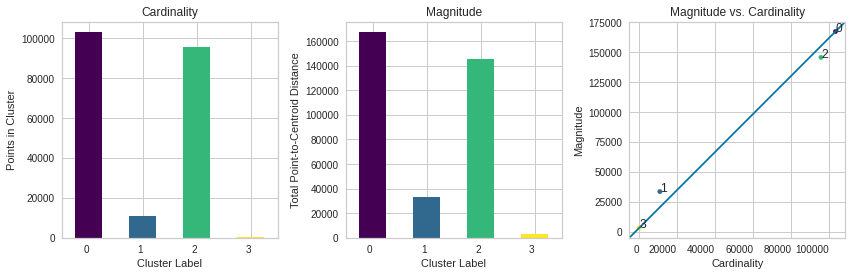

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
dft = df_std.drop('cluster', axis = 1)
plot_cluster_cardinality(km_fit.labels_,
                         ax = ax1,
                         title = "Cardinality",
                         color = colors.iloc[0:km_fit.n_clusters]
                        )
plot_cluster_magnitude(dft,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax = ax2,
                       title = "Magnitude",
                       color = colors.iloc[0:km_fit.n_clusters]
                      )
plot_magnitude_vs_cardinality(dft,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color = colors.iloc[0:km_fit.n_clusters],
                              ax = ax3, 
                              title = "Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()
fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_mag_vs_card_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

In [14]:
df_std.cluster.unique()

array([0, 1, 2, 3], dtype=int32)

In [15]:
colors

0    #440154
1    #31688e
2    #35b779
3    #fde725
Name: 0, dtype: object

fitting...


4it [00:00, 129.70it/s]
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pacmap/pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


embedding...


4it [00:00, 125.84it/s]


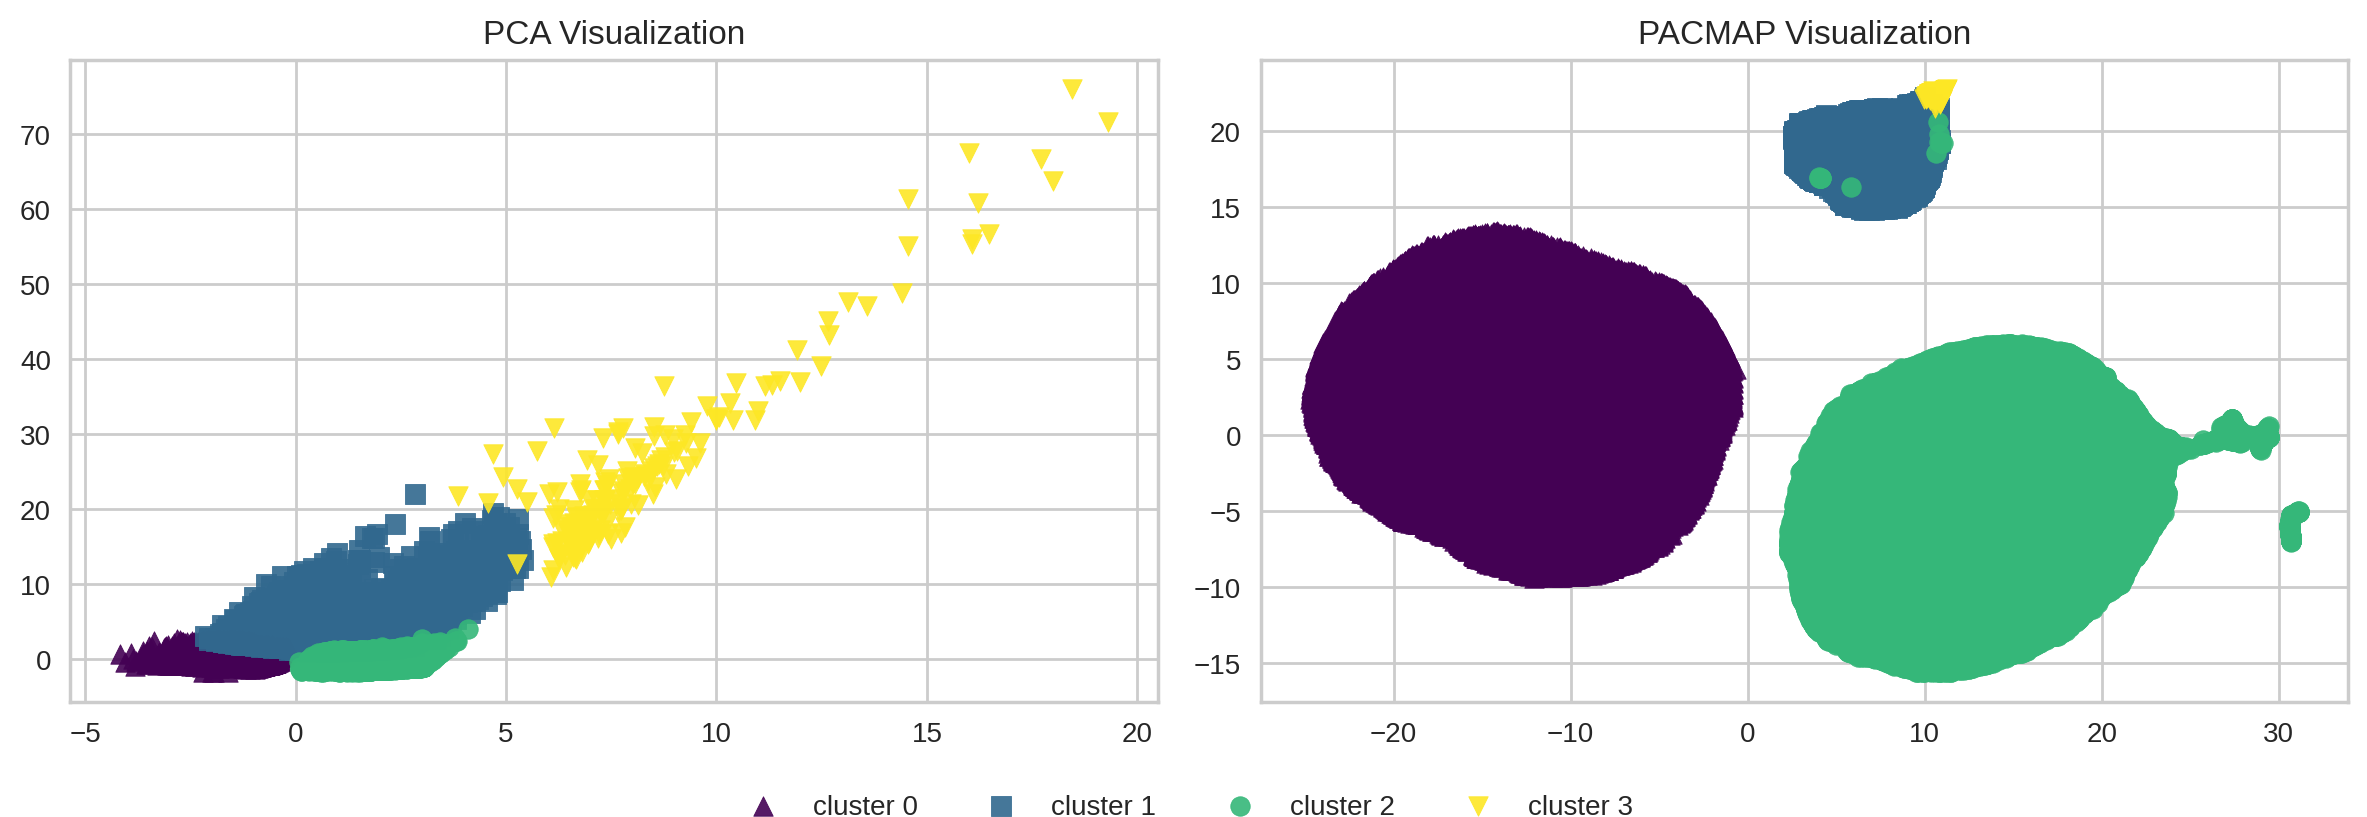

In [16]:
# Visualizing pca and pacmap

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4), dpi = 200)

# PCA
pca_scaled_std = PCA(n_components = 2, random_state = 42)
print('fitting...')
df_std_pca = pca_scaled_std.fit_transform(df_std)

for l, c, m in tqdm(
    zip(range(0, 6), colors[0:km_fit.n_clusters], ('^', 's', 'o', 'v', '.', '*'))
):
    ax1.scatter(df_std_pca[df_std['cluster'] == l, 0],
                df_std_pca[df_std['cluster'] == l, 1],
                c = c,
                label = 'cluster %s' % l,
                alpha = 0.9,
                marker = m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state = 42)
print('embedding...')
df_std_pacmap = embedding.fit_transform(df_std.to_numpy())

for l, c, m in tqdm(
    zip(range(0, 6), colors[0:km_fit.n_clusters], ('^', 's', 'o', 'v','.', '*'))
):
    ax2.scatter(df_std_pacmap[df_std['cluster'] == l, 0],
                df_std_pacmap[df_std['cluster'] == l, 1],
#                     test_df_pacmap[df['cluster'] == l, 2],
                c = c,
                label = 'cluster %s' % l,
                alpha = 0.9,
                marker = m
                )

ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(
    labels, loc = 'lower center', ncol=len(labels), 
    bbox_transform = (1,0), borderaxespad = -0.5)
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_pca_pacmap_n_' + str(selected_n) + '.png'

fig.savefig(fig_dir + file_name)

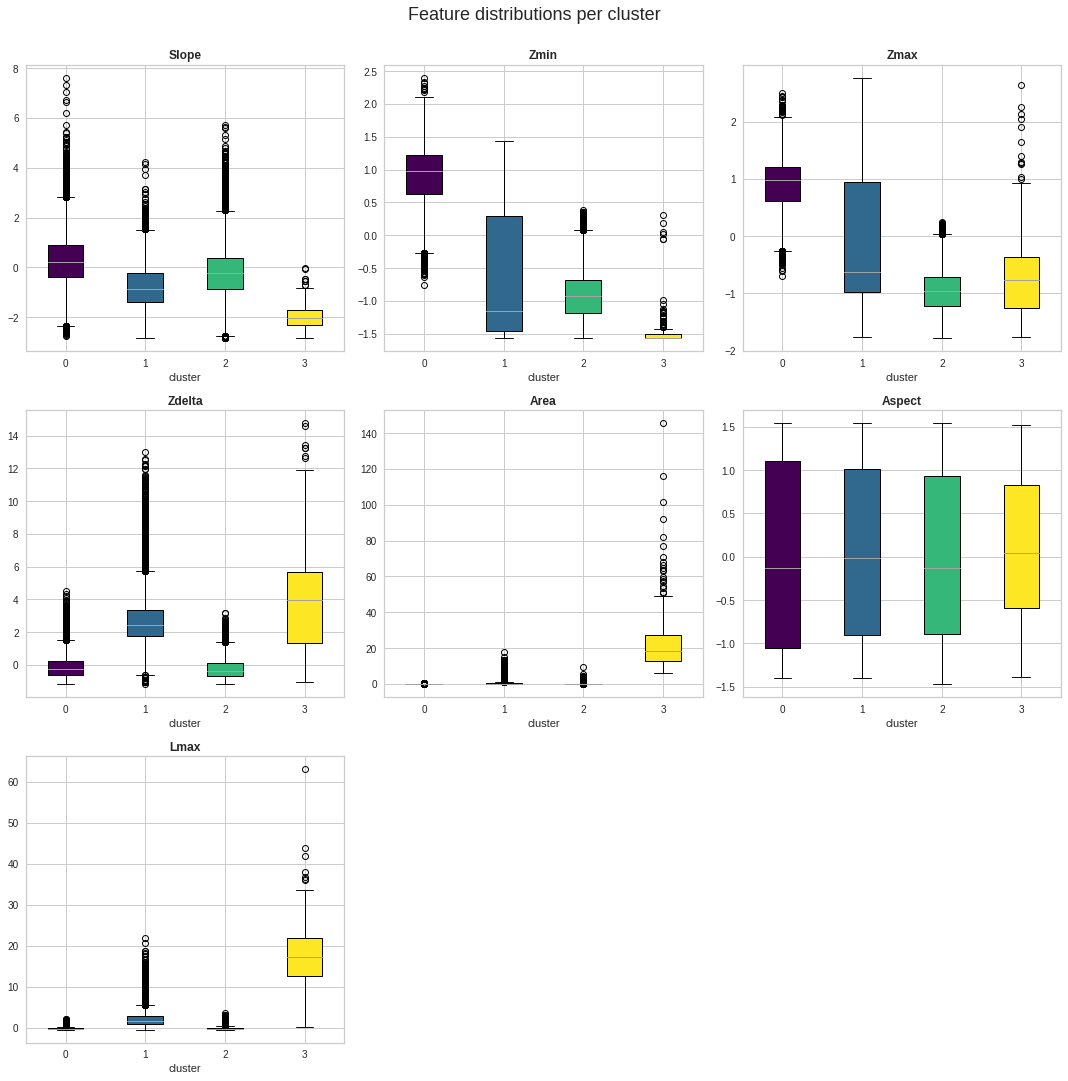

In [17]:
features = df_std[[
#     'CenLat',
#     'CenLon',
    'Slope',
    'Zmin',
#     'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',
    
]]
ncols = 3
nrows = 3
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df_std[[
        feature, 'cluster'
    ]].boxplot(
        by = 'cluster',
        ax = ax,
        return_type = 'both',
        patch_artist = True
    )

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_features_distribution_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

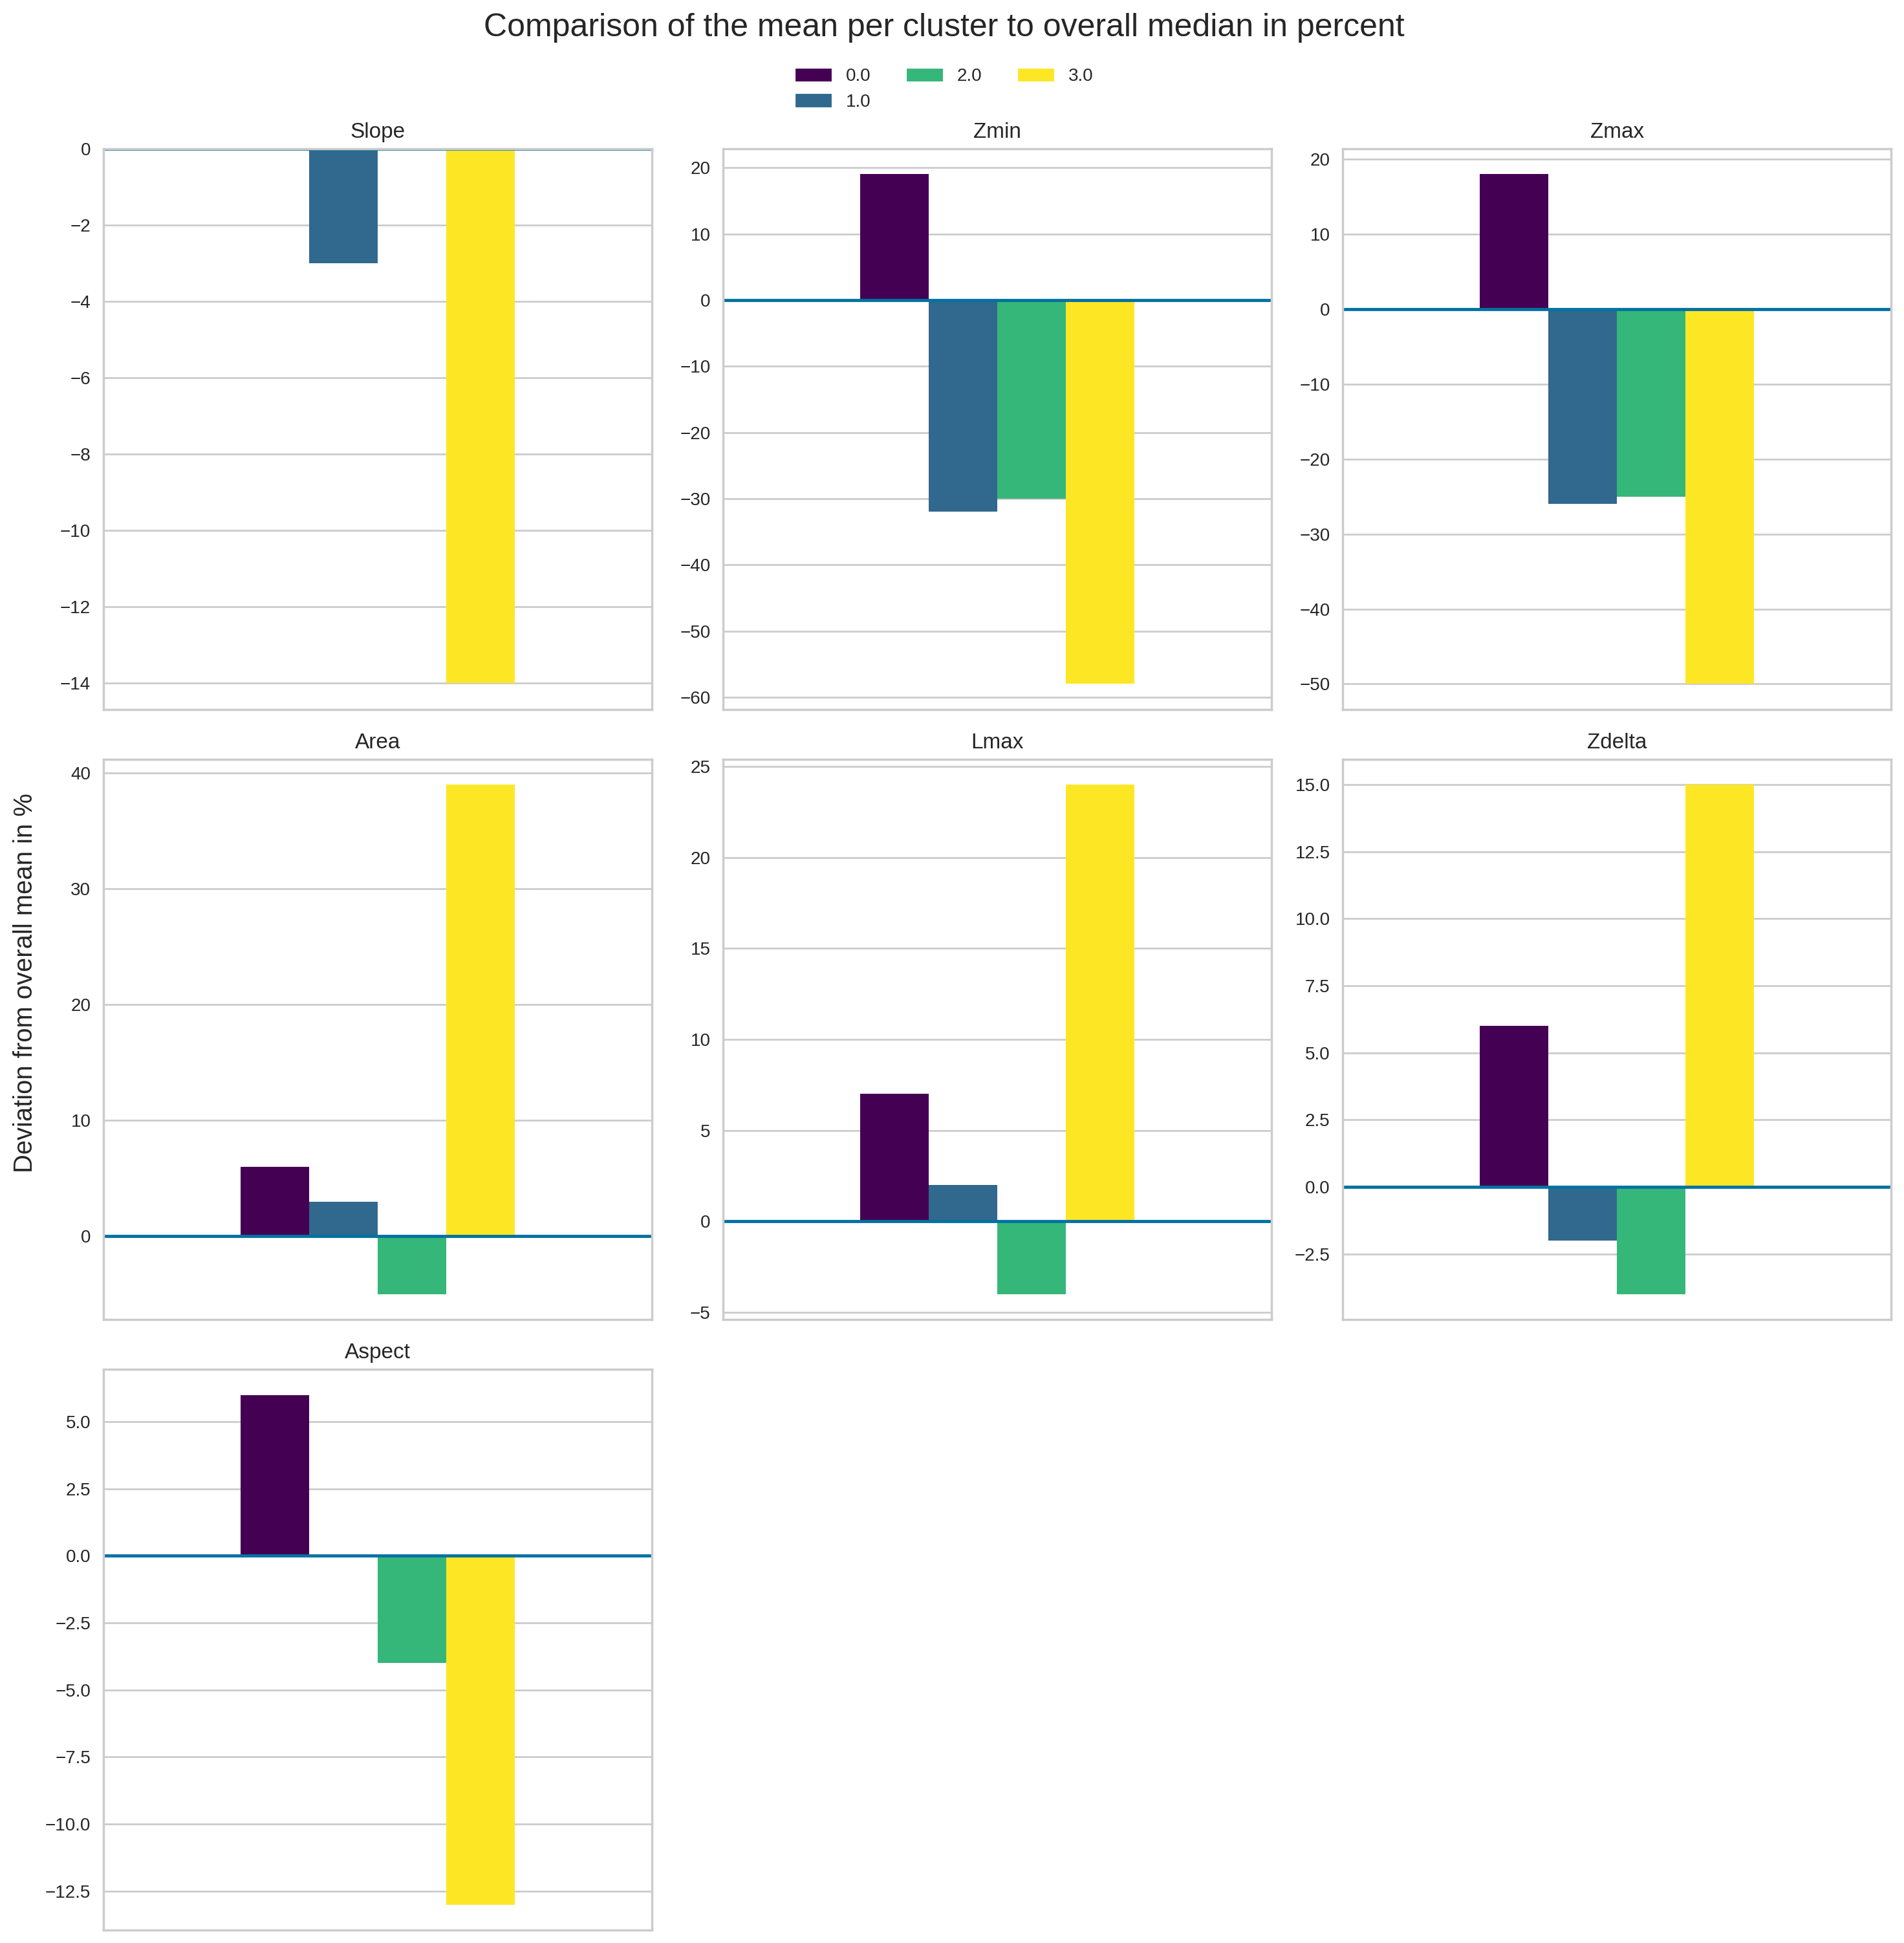

In [18]:
RGI['cluster'] = df_std['cluster']
RGI_median = pd.concat([pd.DataFrame(RGI.median().drop('cluster'), columns=['median']), 
                   RGI.groupby('cluster').median().T], axis=1)

RGI_dev_rel = RGI_median.apply(lambda x: round((x-x['median'])/x['median'],2)*100, axis = 1)
RGI_dev_rel.drop(columns=['median'], inplace=True)
RGI_median.drop(columns=['median'], inplace=True)

df_std_median = pd.concat([pd.DataFrame(df_std.median().drop('cluster'), columns=['median']), 
                   df_std.groupby('cluster').median().T], axis=1)

df_std_dev_rel = df_std_median.apply(
    lambda x: round((x-x['median'])/x['median'],2)*100, axis = 1
)
df_std_dev_rel.drop(columns=['median'], inplace=True)
df_std_median.drop(columns=['median'], inplace=True)


    
gl.cluster_comparison_bar(
    df_std,
    RGI_dev_rel, 
    colors, 
    title="Comparison of the mean per cluster to overall median in percent"
)


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_comparison_bar_median_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)


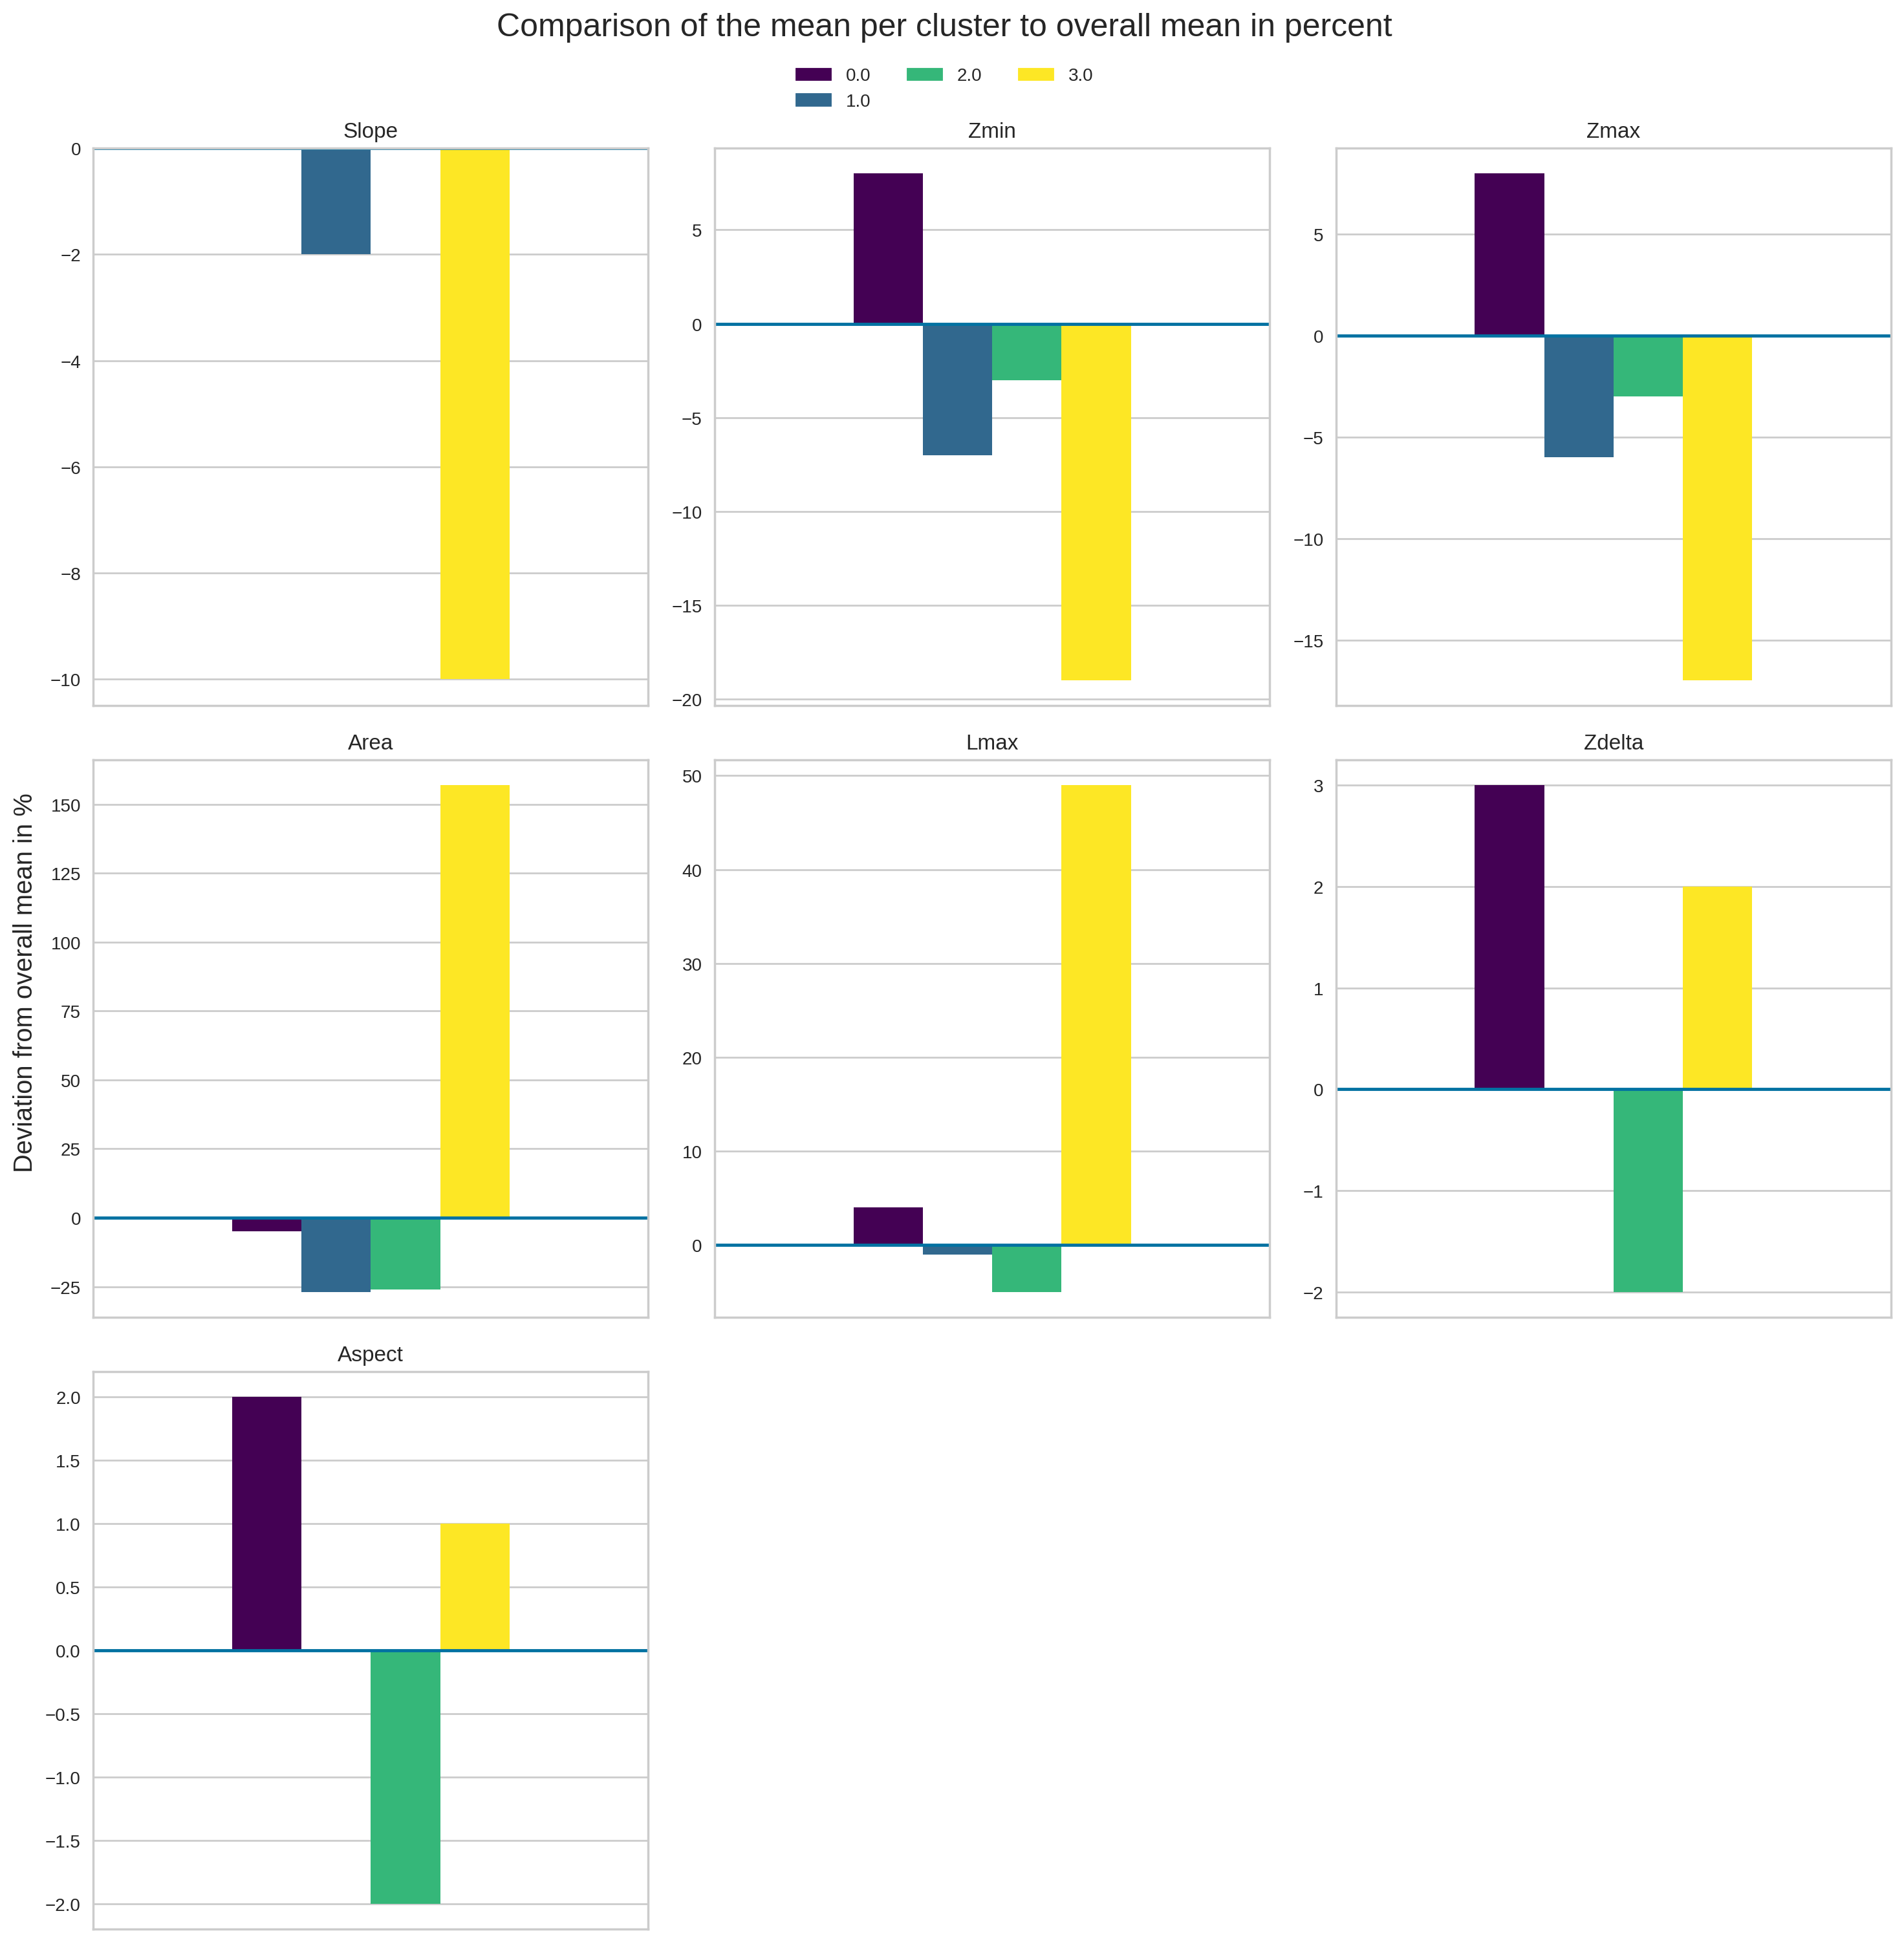

In [19]:

RGI_mean = pd.concat([pd.DataFrame(RGI.mean().drop('cluster'), columns=['mean']), 
                   RGI.groupby('cluster').mean().T], axis=1)

RGI_dev_rel = RGI_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
RGI_dev_rel.drop(columns=['mean'], inplace=True)
RGI_mean.drop(columns=['mean'], inplace=True)

df_std_mean = pd.concat([pd.DataFrame(df_std.mean().drop('cluster'), columns=['mean']), 
                   df_std.groupby('cluster').mean().T], axis=1)

df_std_dev_rel = df_std_mean.apply(
    lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1
)
df_std_dev_rel.drop(columns=['mean'], inplace=True)
df_std_mean.drop(columns=['mean'], inplace=True)


    
gl.cluster_comparison_bar(
    df_std,
    RGI_dev_rel, 
    colors, 
    title="Comparison of the mean per cluster to overall mean in percent"
)


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_comparison_bar_mean_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)


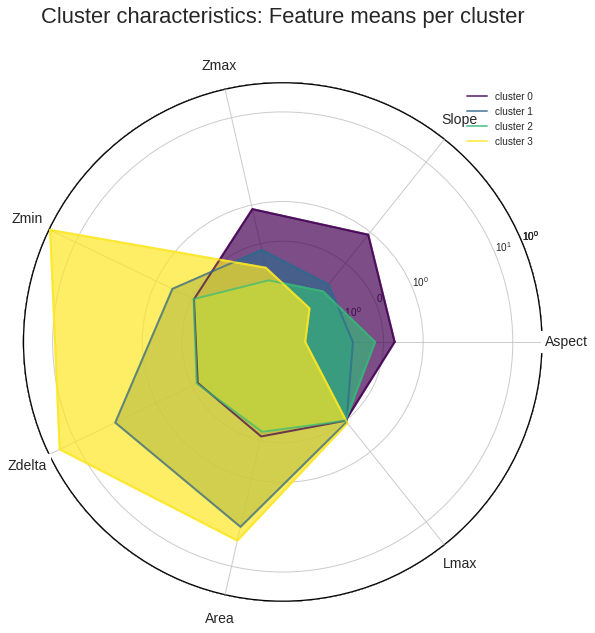

In [20]:


fig = plt.figure(figsize=(8, 8))
no_features = 5
radar = gl.Radar(fig, [
   'Aspect', 'Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax',
], np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = df_std_mean[k].values.tolist()
    radar.plot(
        cluster_data, 
        '-', 
        lw = 2,
        color = colors[k],
        alpha = 0.7, 
        label = 'cluster {}'.format(k)
    )

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

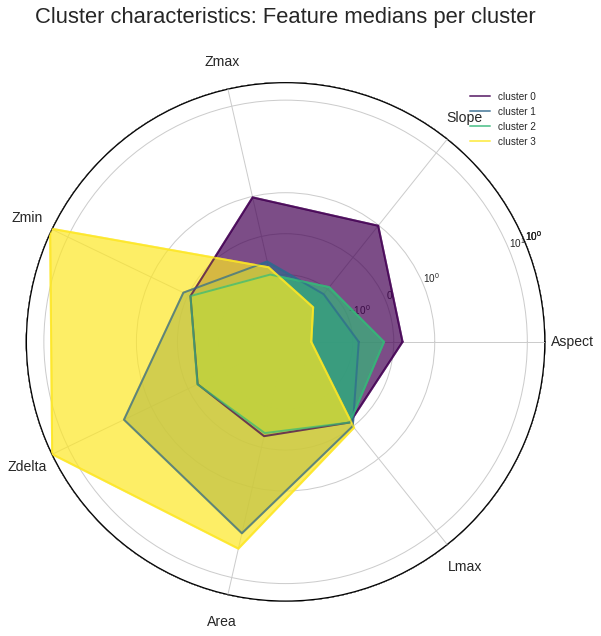

In [21]:


fig = plt.figure(figsize=(8, 8))
no_features = 5
radar = gl.Radar(fig, [
    'Aspect','Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax', 
], np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = df_std_median[k].values.tolist()
    radar.plot(
        cluster_data, 
        '-', 
        lw = 2,
        color = colors[k],
        alpha = 0.7, 
        label = 'cluster {}'.format(k)
    )

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature medians per cluster", size=22, pad=60)
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

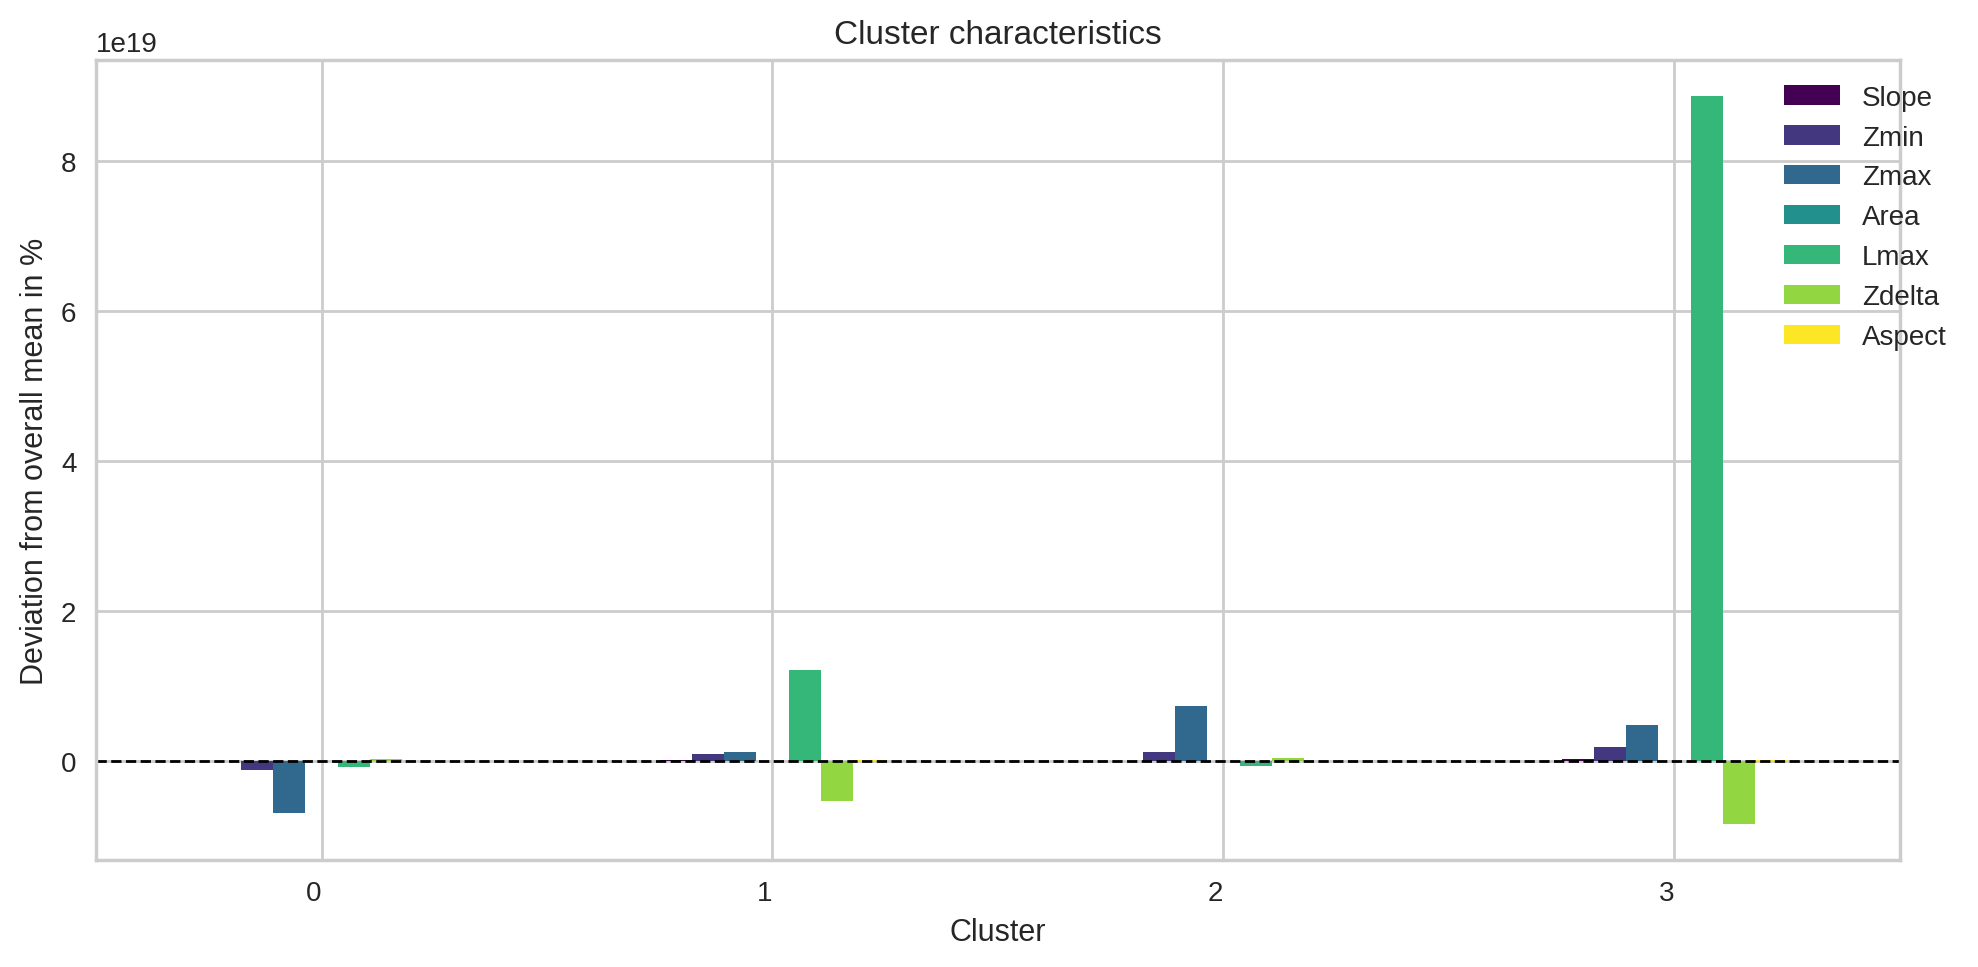

In [22]:
colors_d = gl.color_grabber(
    n_colors = 7,
    color_map = 'viridis'
)

fig = plt.figure(figsize=(10,5), dpi=200)
df_std_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors_d,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
# plt.yscale('log')
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_mean_deviation_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

In [23]:
df_std

,Slope,Zmin,Zmax,Area,Lmax,Zdelta,Aspect,cluster
0,-0.164939,1.135220,1.109920,-0.060089,-0.162733,-0.099690,-1.143760,0
1,-0.925248,1.128450,1.107848,-0.047867,0.087806,-0.075563,1.442448,0
2,-1.127205,1.181052,1.121835,-0.051053,0.009896,-0.273941,1.222172,0
3,-0.212458,1.083660,1.082982,-0.063815,-0.162087,0.026307,1.532191,0
4,1.272521,1.156053,1.109920,-0.064259,-0.313380,-0.206921,1.515874,0
...,...,...,...,...,...,...,...,...
209996,-0.438175,1.095638,1.231660,-0.037866,0.372613,0.734034,-1.119284,0
209997,0.631010,1.132095,1.195397,-0.061653,-0.114888,0.358725,1.320073,0
209998,0.737929,1.147199,1.172085,-0.061518,-0.109716,0.160346,1.409815,0
209999,-0.414415,1.076889,1.127016,-0.045763,0.104616,0.289024,1.540349,0


In [24]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()



RGI = gl.RGI_loader()

RGI = RGI[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
drops = RGI[

    (RGI['Aspect'] < 0) | 
    (RGI['Zmin'] < 0) |
    (RGI['Zmax'] < 0) |
    (RGI['Lmax'] < 0) 

].index
RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, left_index = True, right_index = True)
df = pd.merge(ref, df_std['cluster'], left_index = True, right_index = True)
# df.cluster.unique()
df = df.rename(columns = {
    'Slope_x':'Slope',
    'Zmin_x':'Zmin',
    'Zmax_x':'Zmax',
    'Area_x':'Area',
    'Lmax_x':'Lmax',
    'Zdelta_x':'Zdelta',
    'Aspect_x':'Aspect'
    
})
# df.cluster.unique()
# df['Zdelta'] = df['Zmax'] - df['Zmin']
df = df[[
    'RGIId',
    'Farinotti Mean Thickness',
    'region',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
    'cluster'
]]
df.sort_values('cluster')

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,cluster
122402,RGI60-13.14350,16.871943,13,28.920000,84.957000,21.0,5866,5929,5950,0.052,93,276,0
108148,RGI60-13.00096,25.973772,13,40.078761,73.777465,32.8,4150,4272,4344,0.071,305,325,0
108147,RGI60-13.00095,25.957666,13,40.080108,73.772971,21.6,3942,4037,4265,0.265,358,872,0
108146,RGI60-13.00094,41.438206,13,40.059383,73.707821,32.3,3950,4056,4258,0.093,339,507,0
108145,RGI60-13.00093,31.963820,13,40.051660,73.761566,21.6,4015,4108,4214,0.120,6,525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171464,RGI60-01.04344,27.267294,01,35.688343,73.173099,30.9,4492,4560,4705,0.110,219,292,3
171446,RGI60-01.04326,24.913256,01,35.220908,73.688351,22.8,4314,4402,4521,0.083,317,572,3
168939,RGI60-01.01819,55.846836,01,33.902396,76.420488,16.4,5210,5250,5366,0.129,196,625,3
170425,RGI60-01.03305,37.773110,01,35.130557,74.540841,46.3,5205,5435,5605,0.049,305,375,3


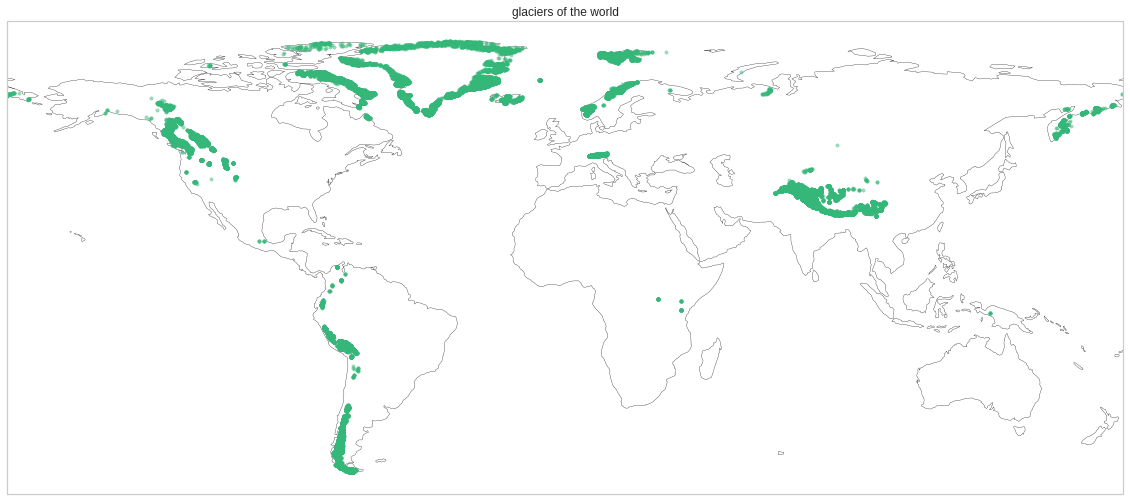

<Figure size 576x396 with 0 Axes>

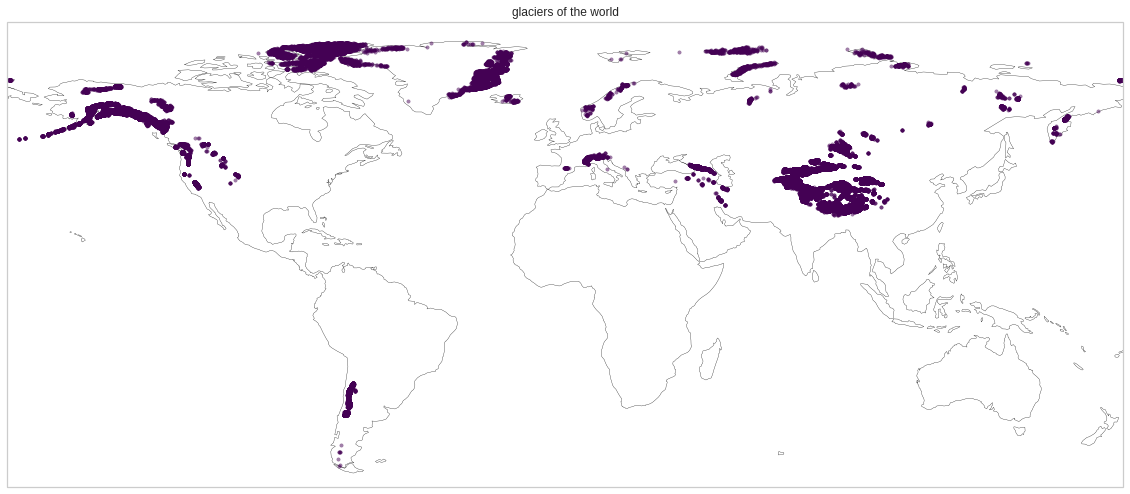

<Figure size 576x396 with 0 Axes>

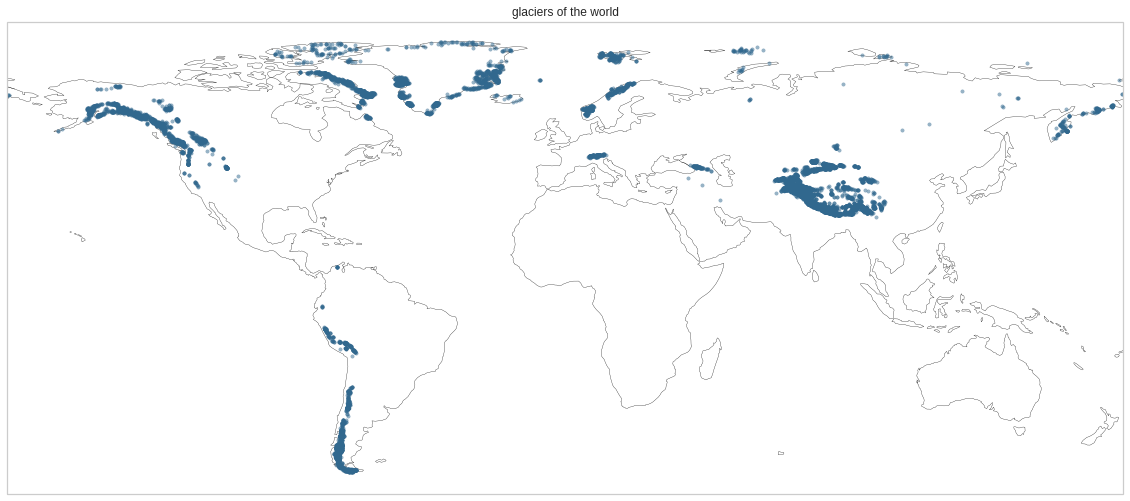

<Figure size 576x396 with 0 Axes>

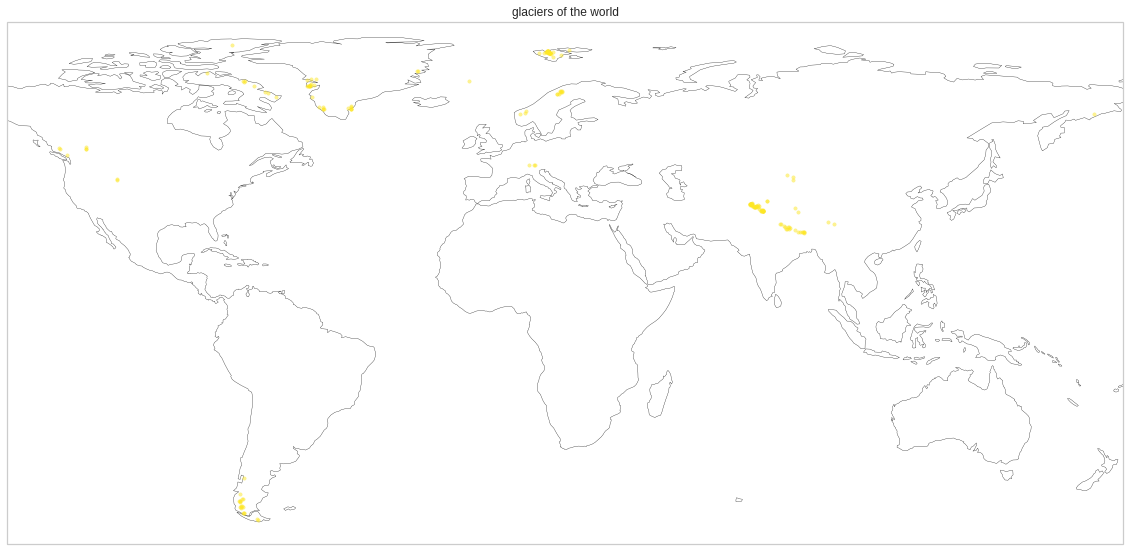

<Figure size 576x396 with 0 Axes>

In [25]:
import cartopy.crs as crs
import cartopy.feature as cfeature
for n in df['cluster'].unique():
    dft = df[df['cluster'] == n]
    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE)
    plt.scatter(
        x = dft['CenLon'], 
        y = dft['CenLat'],
        color = colors[n],
#         cmap = 'viridis',
        marker = '.', 
        alpha = 0.5

    )
    ax.set_title('glaciers of the world')
    plt.show()
    plt.savefig('figs/cluster/global_map.png')

In [ ]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

In [26]:
residuals = pd.DataFrame()

lr_list = ['0.1', '0.01', '0.001']
for lr in lr_list:
    top_learning_rate = lr
    epochs = 100
    dropout = 1
    dataset_list = ['df1', 'df2', 'df3', 'df4', 'df5', 'df7', 'df8', 'df9']
    for dataset in dataset_list:
        selected_dataset = dataset
        if selected_dataset == 'df1': 
            df1 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
                RGI_input = 'n'
            )
            module = 'sm1'
            res = 'sr1'
            dataset = df1
            dataset.name = 'df1'
            arch = '24-12'
        if selected_dataset == 'df2':
            df2 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
                RGI_input = 'y',
                scale = 'g',
                area_scrubber = 'off'
            )
            df2 = df2.drop(['region'], axis = 1)
            module = 'sm2'
            res = 'sr2'
            dataset = df2
            dataset.name = 'df2'
            arch = '64-48'
        if selected_dataset == 'df3':
            df3 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
                RGI_input = 'y',
                scale = 'g',
                area_scrubber = 'on',
                anomaly_input = 1
            )
            df3 = df3.drop(['RGIId', 'region'], axis = 1)
            module = 'sm3'
            res = 'sr3'
            dataset = df3
            dataset.name = 'df3'
            arch = '59-28'
        if selected_dataset == 'df4':
            df4 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
                RGI_input = 'y',
                scale = 'g',
                area_scrubber = 'on',
                anomaly_input = 5
            )
            df4 = df4.drop(['RGIId', 'region'], axis = 1)
            module = 'sm4'
            res = 'sr4'
            dataset = df4
            dataset.name = 'df4'
            arch = '64-36'
        if selected_dataset == 'df5':
            df5 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
                RGI_input = 'y',
                scale = 'g',
                area_scrubber = 'off'
            )
            df5 = df5.drop(['Zmed', 'region'], axis = 1)
            dataset = df5
            dataset.name = selected_dataset
            module = 'sm5'
            res = 'sr5'
            dataset.name = 'df5'
            arch = '64-42'
    #     if selected_dataset == 'df6':
    #         df6 = gl.data_loader(
    #     #         root_dir = '/home/simonhans/data/prethicktor/',
    #             RGI_input = 'y',
    #             scale = 'r',
    #             region_selection = 1,
    #             area_scrubber = 'off'
    #         )
    #         module = 'sm6'
    #         res = 'sr6'
    #         reg = df6['region'].iloc[-1]
    #         df6 = df6.drop('region', axis=1)
    #         dataset = df6 
    #         dataset.name = str('df6_' + str(reg))
        if selected_dataset == 'df7':
            df7 = gl.data_loader(
        #         root_dir = '/home/simonhans/data/prethicktor/',
            )
            df7 = df7.drop(['region'], axis = 1)
            module = 'sm7'
            res = 'sr7'
            dataset = df7 
            dataset.name = 'df7'
            arch = '64-48'
        if selected_dataset == 'df8':
            df8 = gl.data_loader(
                area_scrubber = 'on',
                anomaly_input = 1
            )
            df8 = df8.drop(['RGIId','Zmed', 'region'], axis = 1)
            module = 'sm8'
            res = 'sr8'
            dataset = df8 
            dataset.name = 'df8'
            arch = '60-46'
        if selected_dataset == 'df9':
            df9 = gl.data_loader(
                area_scrubber = 'on',
                anomaly_input = 1
            )
            df9 = df9.drop(['RGIId','region'], axis = 1)
            df9['Zdelta'] = df9['Zmax'] - df9['Zmin']
            module = 'sm9'
            res = 'sr9'
            dataset = df9 
            dataset.name = 'df9'
            arch = '60-30'

        rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'
    #     print('df length = ' + str(len(ref)))
        RGI_for_predictions = df[[
            'CenLat',
            'CenLon',
            'Slope',
            'Zmin',
            'Zmed',
            'Zmax',
            'Area',
            'Aspect',
            'Lmax',
        ]]

        if selected_dataset == 'df5' or selected_dataset == 'df8':
            RGI_for_predictions = RGI_for_predictions.drop('Zmed', axis = 1
                                                          )
        if selected_dataset == 'df1':
            RGI_for_predictions = RGI_for_predictions[[
                'CenLat',
                'CenLon',
                'Slope',
                'Area'
            ]]

            RGI_for_predictions = RGI_for_predictions.rename(columns = {
                'CenLat':'Lat',
                'CenLon':'Lon',
                'Slope':'Mean Slope'
            })
        if selected_dataset == 'df9':
             RGI_for_predictions['Zdelta'] = (
                 RGI_for_predictions['Zmax'] - RGI_for_predictions['Zmin']
             )
    #     print('RGI length = ' + str(len(RGI_for_predictions)))
        dnn_model = {}
        RS = range(0,25,1)
        df_y = pd.DataFrame()
        for rs in tqdm((RS)):
            model_name = (
                str(arch) + 
                '_' + 
                dataset.name +
                '_' + 
                str(dropout) +
                '_dnn_MULTI_' + 
                str(top_learning_rate) + 
                '_0.2_' +
                str(epochs) + 
                '_' + 
                str(rs)
            )   

            model_path = (
                rootdir + 
                dataset.name +
                '_' + 
                str(dropout) +
                '_dnn_MULTI_' + 
                str(top_learning_rate) + 
                '_0.2_' +
                str(epochs) + 
                '_' + 
                str(rs)
            )

            dnn_model[model_name] = tf.keras.models.load_model(model_path)

            y = pd.DataFrame(dnn_model[model_name].predict(RGI_for_predictions, verbose = 0))
            df_y = pd.concat([df_y,y], axis = 1)
        #     print('y length = ' + str(len(y))) 1)
        df['Edasi Thickness'] = df_y.mean(axis = 1)
        df['VE - VF'] = df['Edasi Thickness'] - df['Farinotti Mean Thickness']
        df['VE / VF'] = df['Edasi Thickness'] / df['Farinotti Mean Thickness']
        df = df.dropna()
        residuals_temp = pd.DataFrame()
        residuals_temp['cluster'] = df['cluster']
        residuals_temp = residuals_temp.drop_duplicates()
        residuals_temp = residuals_temp.sort_values('cluster')
        for i in residuals_temp['cluster'].values:
    #         print(i)
            residuals_temp.loc[
                residuals_temp.index[residuals_temp['cluster'] == i], 'Farinotti Mean Thickness'
            ] = (
                sum(
                    df['Farinotti Mean Thickness'][df['cluster'] == i]
                ) / sum(
                    df['Area'][df['cluster'] == i]
                )
            )
            residuals_temp.loc[
                residuals_temp.index[residuals_temp['cluster'] == i], 'Edasi Mean Thickness'
            ] = (
                sum(
                    df['Edasi Thickness'][df['cluster'] == i]
                ) / sum(
                    df['Area'][df['cluster'] == i]
                )
            )


        residuals_temp['VE / VF'] = (
            residuals_temp['Edasi Mean Thickness'] / residuals_temp['Farinotti Mean Thickness']
        )
        residuals_temp['dataframe'] = dataset.name
        residuals_temp['architecture'] = arch
        residuals_temp['learning rate'] = top_learning_rate

    #     residuals_temp['learning rate'] = learning_rate
        residuals = pd.concat([residuals, residuals_temp], ignore_index = True)


  0%|          | 0/25 [00:00<?, ?it/s]2022-09-08 15:08:39.951375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-08 15:08:39.951400: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-08 15:08:39.951791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate 

In [27]:
residuals = residuals.sort_values(['dataframe', 'cluster', 'VE / VF'])
dfst = residuals[residuals['VE / VF'] <= 2]
dfst[
#     (dfst['dataframe'] == 'df8') &
    (dfst['learning rate'] == '0.001') 
#     (dfst['learning rate'] == '0.01')
].sort_values(['dataframe', 'learning rate', 'VE / VF'])

,cluster,Farinotti Mean Thickness,Edasi Mean Thickness,VE / VF,dataframe,architecture,learning rate
64,0,6.222810,8.441213,1.356496,df1,24-12,0.001
65,1,8.621193,12.214500,1.416799,df1,24-12,0.001
67,3,1.949333,3.163181,1.622699,df1,24-12,0.001
66,2,7.189336,11.992790,1.668136,df1,24-12,0.001
75,3,1.852731,1.884345,1.017063,df3,59-28,0.001
73,1,7.435939,9.054530,1.217671,df3,59-28,0.001
72,0,4.529830,5.706215,1.259698,df3,59-28,0.001
74,2,6.926607,8.952060,1.292416,df3,59-28,0.001
79,3,1.832448,1.750953,0.955527,df4,64-36,0.001
78,2,6.804706,7.304970,1.073517,df4,64-36,0.001


In [ ]:
residuals.sort_values(['dataframe', 'cluster'])

In [ ]:
# # full loop for all figs excluding elbow and silhouettes
# for n in range(2, 7, 1):
#     RGI = gl.RGI_loader()

#     RGI = RGI[[
#     #     'CenLat',
#     #     'CenLon',
#         'Slope',
#         'Zmin',
#     #     'Zmed',
#         'Zmax',
#         'Area',
#         # 'Aspect',
#         'Lmax'
#     ]]
#     drops = RGI[

# #         (RGI[# 'Aspect'] < 0) | 
#         (RGI['Zmin'] < 0) |
#         (RGI['Zmax'] < 0) |
#         (RGI['Lmax'] < 0) 

#     ].index
#     RGI = RGI.drop(drops)
#     RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']

#     scaler = StandardScaler()
#     RGI_std = scaler.fit_transform(RGI)
#     df_std = pd.DataFrame(RGI_std, columns = RGI.columns)
#     dft_std = scaler.fit_transform(RGI)
#     km = KMeans(n_clusters=n, 
#                 max_iter=300, 
#                 tol=1e-04, 
#                 init='k-means++', 
#                 n_init=10, 
#                 random_state=42, 
#                 algorithm='auto')

#     km_fit = km.fit(df_std)
#     df_std['cluster'] = km_fit.predict(df_std)
#     RGI['cluster'] = df_std['cluster']


#     # Final decision
#     km = KMeans(n_clusters = n, 
#                 max_iter = 300, 
#                 tol = 1e-04, 
#                 init = 'k-means++', 
#                 n_init = 10, 
#                 random_state = 42, 
#                 algorithm = 'auto')

#     km_fit = km.fit(df_std)
#     df_std['cluster'] = km_fit.predict(df_std)
#     RGI['cluster'] = df_std['cluster']


#     colors = gl.color_grabber(
#         n_colors = n,
#         color_map = 'viridis'
#     )
    
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))

#     plot_cluster_cardinality(km_fit.labels_,
#                              ax = ax1,
#                              title = "Cardinality",
#                              color = colors.iloc[0:km_fit.n_clusters]
#                             )
#     plot_cluster_magnitude(df_std,
#                            km_fit.labels_,
#                            km_fit.cluster_centers_,
#                            euclidean,
#                            ax = ax2,
#                            title = "Magnitude",
#                            color = colors.iloc[0:km_fit.n_clusters]
#                           )
#     plot_magnitude_vs_cardinality(df_std,
#                                   km_fit.labels_,
#                                   km_fit.cluster_centers_,
#                                   euclidean,
#                                   color = colors.iloc[0:km_fit.n_clusters],
#                                   ax = ax3, 
#                                   title = "Magnitude vs. Cardinality")

#     fig.autofmt_xdate(rotation=0)
#     plt.tight_layout()
#     plt.show()
#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_mag_vs_card_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


#     features = df_std[[
#     #     'CenLat',
#     #     'CenLon',
#         'Slope',
#         'Zmin',
#     #     'Zmed',
#         'Zmax',
#         'Zdelta',
#         'Area',
#     #     'Aspect',
#         'Lmax',

#     ]]
#     ncols = 3
#     nrows = 3
#     fig = plt.figure(figsize=(15,15))

#     for n, feature in enumerate(features):
#         ax = plt.subplot(nrows, ncols, n + 1)
#         box = df_std[[
#             feature, 'cluster'
#         ]].boxplot(
#             by = 'cluster',
#             ax = ax,
#             return_type = 'both',
#             patch_artist = True
#         )

#         for row_key, (ax,row) in box.iteritems():
#             ax.set_xlabel('cluster')
#             ax.set_title(feature,fontweight="bold")
#             for i,box in enumerate(row['boxes']):
#                 box.set_facecolor(colors[i])

#     fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
#     plt.tight_layout()
#     plt.show()

#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_features_distribution_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)
    
    
#     RGI_mean = pd.concat([pd.DataFrame(RGI.mean().drop('cluster'), columns=['mean']), 
#                    RGI.groupby('cluster').mean().T], axis=1)

#     RGI_dev_rel = RGI_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
#     RGI_dev_rel.drop(columns=['mean'], inplace=True)
#     RGI_mean.drop(columns=['mean'], inplace=True)

#     df_std_mean = pd.concat([pd.DataFrame(df_std.mean().drop('cluster'), columns=['mean']), 
#                        df_std.groupby('cluster').mean().T], axis=1)

#     df_std_dev_rel = df_std_mean.apply(
#         lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1
#     )
#     df_std_dev_rel.drop(columns=['mean'], inplace=True)
#     df_std_mean.drop(columns=['mean'], inplace=True)

    
    
    
#     gl.cluster_comparison_bar(
#         df_std,
#         RGI_dev_rel, 
#         colors, 
#         title="Comparison of the mean per cluster to overall mean in percent"
#     )


#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_comparison_bar_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


#     fig = plt.figure(figsize=(8, 8))
#     no_features = 5
#     radar = gl.Radar(fig, [
#         'Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax',
#     ], np.unique(km.labels_))

#     for k in range(0,km.n_clusters):
#         cluster_data = df_std_mean[k].values.tolist()
#         radar.plot(
#             cluster_data, 
#             '-', 
#             lw = 2,
#             color = colors[k],
#             alpha = 0.7, 
#             label = 'cluster {}'.format(k)
#         )

#     radar.ax.legend()
#     radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
#     plt.show()


#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)
    
    
    
#     colors_d = gl.color_grabber(
#         n_colors = 6,
#         color_map = 'viridis'
#     )

#     fig = plt.figure(figsize=(10,5), dpi=200)
#     df_std_dev_rel.T.plot(kind='bar', 
#                            ax=fig.add_subplot(), 
#                            title="Cluster characteristics", 
#                            color=colors_d,
#                            xlabel="Cluster",
#                            ylabel="Deviation from overall mean in %"
#                           )
#     plt.axhline(y=0, linewidth=1, ls='--', color='black')
#     plt.legend(bbox_to_anchor=(1.04,1))
#     fig.autofmt_xdate(rotation=0)
#     plt.yscale('log')
#     plt.tight_layout()
#     plt.show()

#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_mean_deviation_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


In [ ]:
# plot Kmeans for RGI regions by statstical value comparing attributes 
# cannot show centroids because it won't work for reasons I do not know just yet

dft_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
stat_list = [
    'mean',
    'median',
    'std',
    'iqr'
]

for statistic in tqdm(stat_list):
    stat = statistic



    dft = df[[
        'Area_RGI_' + stat,
        'Aspect_RGI_' + stat,
        'Lmax_RGI_' + stat,
        'Slope_RGI_'+ stat,
        'Zmin_RGI_' + stat,
        'Zmax_RGI_' + stat
    ]]   

    dft = dft.rename(columns = {
        'Area_RGI_' + stat:'Area',
        'Aspect_RGI_' + stat:'Aspect',
        'Lmax_RGI_' + stat:'Lmax',
        'Slope_RGI_' + stat:'Slope',
        'Zmin_RGI_' + stat:'Zmin',
        'Zmax_RGI_' + stat:'Zmax'
    })

    if statistic == 'mean':
        chosen_n = 7
    if statistic == 'median':
        chosen_n = 4
    if statistic == 'std':
        chosen_n = 5
    if statistic == 'iqr':
        chosen_n = 3
        
    kmeans = KMeans(n_clusters = chosen_n, random_state = 0)
    dft[stat] = kmeans.fit_predict(dft)
    residuals[stat] = dft[stat]


    for attribute in dft_list:
    

        fig, ax = plt.subplots(1, 1, figsize = (20,20))
        fig.patch.set_facecolor('w')
        plt.suptitle(
            'Cluster Analysis of RGI ' + attribute + ' ' + stat + 
            ' against RGI Attribute ' + stat, 
            fontsize=18, y=0.95
        )

        for n, att in enumerate(dft_list):
            ax = plt.subplot(3,2,n+1)

            plt.scatter(
                dft[attribute],
                dft[att],
                c = dft[stat], 
                cmap = 'viridis',
                alpha = 1, 
                marker = 'o'

            )
            ax.set_xlabel('RGI ' + stat + ' ' + attribute)
            ax.set_ylabel('RGI ' + stat + ' ' + att)
            ax.set_title('RGI ' + stat + ' ' + attribute + ' against ' + stat + ' '+ att )


            for i in df.index:
                plt.text(
                    x = dft[attribute].loc[i] + 0.02,
                    y = (
                        dft[att].loc[i]) + 0.02,
                    s = df['dataframe'].str[4:].loc[i] + '-' + str(dft[stat].loc[i])
                )
#             plt.savefig(
#                 'figs/cluster_analysis_' + 
#                 attribute + '_' + stat + '.eps'
#             )
            
            
#             plt.savefig(
#                 'figs/cluster_analysis_' + 
#                 attribute + '_' + stat + '.png'
#             )

In [ ]:
#### KMeans elbow plot for RGI statistiscs at region scale comparing statistics


att_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
for attribute in att_list:
    dft = df[[
        attribute + '_RGI_mean',
        attribute + '_RGI_median',
        attribute + '_RGI_std',
        attribute + '_RGI_iqr',
        
    ]]

    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    plt.subplots_adjust(hspace=0.5)
    fig.patch.set_facecolor('w')
    
    # ELBOW PLOT START

    x = dft.iloc[:,[0,1]]
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters = k)
        kmeanModel.fit(x)
        distortions.append(kmeanModel.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.suptitle(
        'The Elbow Method showing the optimal clusters for ' + attribute, 
        fontsize=18, y=0.95)

# ELBOW PLOT END

    plt.show()    

In [ ]:
# plot Kmeans for RGI regions by attribute comparing statistics 
# cannot show centroids because it won't work for reasons I do not know just yet
stat_list = [
    'mean',
    'median',
    'std',
    'iqr'
]

att_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
for i in att_list:
    dft = df[[
        i + '_RGI_mean',
        i + '_RGI_median',
        i + '_RGI_std',
        i + '_RGI_iqr',
        
    ]]
    
    dft = dft.rename(columns = {
        i + '_RGI_mean':'mean',
        i + '_RGI_median':'median',
        i + '_RGI_std':'std',
        i + '_RGI_iqr':'iqr',
    })
    if i == 'Area':
        chosen_n =  3
    if i == 'Aspect':
        chosen_n =  4
    if i == 'Lmax':
        chosen_n =  4
    if i == 'Slope':
        chosen_n =  6
    if i == 'Zmin':
        chosen_n = 4                      
    if i == 'Zmax':
        chosen_n =  4
                     
                     
    kmeans = KMeans(n_clusters = chosen_n, random_state = 0)
    dft['cluster'] = kmeans.fit_predict(dft)
#     residuals[i] = dft[i]

    
    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    fig.patch.set_facecolor('w')
    plt.suptitle(
        'Cluster Analysis of RGI ' + i + ' statistics', 
        fontsize=18, y=0.95
    )

    for n, stat in enumerate(stat_list):
        ax = plt.subplot(2,2,n+1)

        plt.scatter(
            dft['mean'],
            dft[stat],
            c = dft['cluster'], 
            cmap = 'viridis',
            alpha = 1, 
            marker = 'o'

        )
        ax.set_xlabel('RGI mean ' + ' ' + i)
        ax.set_ylabel('RGI ' + stat + ' ' + i)
        ax.set_title('RGI mean ' + i + ' against ' + stat + ' '+ i )
#         print(dft['cluster'])

        for j in (df.index):
            plt.text(
                x = dft['mean'].loc[j] + 0.02,
                y = (
                    dft[stat].loc[j]) + 0.02,
                s = df['dataframe'].str[4:].loc[j] +
                 '-' + str(dft['cluster'].loc[j])
            )
#         plt.savefig(
#             'figs/cluster_analysis_' + 
#             i + '_' + 'statistics' + '.eps'
#         )
        
        
#         plt.savefig(
#             'figs/cluster_analysis_' + 
#             i + '_' + 'statistics' + '.png'
#         )

In [ ]:
# not enough data to verify physical models from just data perspective